In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bikes.csv to Bikes (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Bikes.csv']))

In [ ]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
dataset.head()

,datetime,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1,0,0,1,24.0,28.79,81.0,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,22.0,27.27,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,22.0,27.27,80.0,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,24.0,28.79,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,24.0,28.79,75.0,0.0,0,1,1


In [ ]:
dataset.drop(['datetime'], axis=1, inplace=True)
dataset.head()

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,24.0,28.79,81.0,0.0,3,13,16
1,1,0,0,1,22.0,27.27,80.0,0.0,8,32,40
2,1,0,0,1,22.0,27.27,80.0,0.0,5,27,32
3,1,0,0,1,24.0,28.79,75.0,0.0,3,10,13
4,1,0,0,1,24.0,28.79,75.0,0.0,0,1,1


In [ ]:
dataset

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,24.0,28.79,81.0,0.00,3,13,16
1,1,0,0,1,22.0,27.27,80.0,0.00,8,32,40
2,1,0,0,1,22.0,27.27,80.0,0.00,5,27,32
3,1,0,0,1,24.0,28.79,75.0,0.00,3,10,13
4,1,0,0,1,24.0,28.79,75.0,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,2,26.0,25.76,60.0,16.42,11,108,119
17375,1,0,1,2,26.0,25.76,60.0,16.42,8,81,89
17376,1,0,1,1,26.0,25.76,60.0,16.42,7,83,90
17377,1,0,1,1,26.0,27.27,56.0,13.43,13,48,61


##**Probabilidade Simples**

Qual a probabilidade de uma bicicleta ser usada em um dia de feriado ?

In [ ]:
probHoli = len(dataset[dataset['holiday'] == 1]) / len(dataset)
print('A probabilidade de uma bicicleta ser utilizada em um feriado é de ' + str(round(probHoli*100, 4)) + '%')

A probabilidade de uma bicicleta ser utilizada em um feriado é de 2.877%


Comparativos externos: Comparativo da probabilidade de ser feriado em um ano em Washington


In [ ]:
probHoli2 = 20/365
print('A probabilidade do dia ser feriado em um ano em Washington é de ' + str(round(probHoli2*100,4)) + '%')

A probabilidade do dia ser feriado em um ano em Washington é de 5.4795%


##**Probabilidade da União ou Probabilidade da Soma**


Qual a probabilidade de uma bicicleta ser utilizada no verão em um feriado ou dia normal?


In [ ]:
Estacao = len(dataset[((dataset['season'] == 2) & (dataset['workingday'] == 1))| (dataset['season'] == 2) & (dataset['holiday'] == 1)])
probEstacao = Estacao/len(dataset)
print('A probabilidade de uma bicicleta ser utilizada no verão ou em um feriado é de ' + str(round(probEstacao*100, 4)) + '%')

A probabilidade de uma bicicleta ser utilizada no verão ou em um feriado é de 18.1944%


##**Probabilidade da Intersecção**

Qual a probabilidade de uma bicicleta ser utilizada em um feriado e ser verão ?

In [ ]:
veraoFeriado = len(dataset[(dataset['holiday'] == 1) & (dataset['season'] == 2)])
probVerFe = veraoFeriado/len(dataset)
print('A probabilidade de uma bicicleta ser utilizada em um dia que seja verão e feriado é de ' + str(round(probVerFe*100, 4)) + '%')

A probabilidade de uma bicicleta ser utilizada em um dia que seja verão e feriado é de 0.5524%


##**Probabilidade Complementar**

Qual a probabilidade de uma bicicleta ser utilizada em um feriado e não ser verão ?

In [ ]:
probHoliNFeriado = probHoli - probVerFe
print('A probabilidade de uma bicicleta ser utilizada em um feriado e não ser verão é de ', str(round(probHoliNFeriado*100, 4)) + '%')

A probabilidade de uma bicicleta ser utilizada em um feriado e não ser verão é de  2.3246%


##**Probabilidade da Diferença**


Qual a probabilidade de ser verão mas não ser feriado ? 

In [ ]:
dif = len(dataset[dataset['season']==2]) - len(dataset[(dataset['holiday']>0) & (dataset['season']==2)])
ProbDif = dif/len(dataset)
print('A probabilidade ser verão mas não ser feriado é de ' + str(round(ProbDif*100, 4)) + '%')

A probabilidade ser verão mas não ser feriado é de 24.8173%


##**Probabilidade Condicional**

Qual a probabilidade de ser verão se for feriado ?

In [ ]:
probCond = probVerFe/probHoli
print('A probabilidade de ser verão se for feriado é de ' + str(round(probCond*100, 4)) + '%')

A probabilidade de ser verão se for feriado é de 19.2%


##**Teorema de Bayes**

Qual a probabilidade de ser feriado tal que seja verão ?

In [ ]:
probFetqVe = (probHoli * probCond)/probEstacao
print('A probabilidade que seja feriado tal que seja verão é: ' + str(round(probFetqVe*100, 4)) + '%')

A probabilidade que seja feriado tal que seja verão é: 3.0361%


##**Variáveis Aleatórias**

In [ ]:
dataset['week&holi'] = dataset['holiday'] + dataset['workingday']

In [ ]:
dataset.head()

,datetime,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,teste,week&holi
0,2011-01-01 00:00:00,1,0,0,1,24.0,28.79,81.0,0.0,3,13,16,0,0
1,2011-01-01 01:00:00,1,0,0,1,22.0,27.27,80.0,0.0,8,32,40,0,0
2,2011-01-01 02:00:00,1,0,0,1,22.0,27.27,80.0,0.0,5,27,32,0,0
3,2011-01-01 03:00:00,1,0,0,1,24.0,28.79,75.0,0.0,3,10,13,0,0
4,2011-01-01 04:00:00,1,0,0,1,24.0,28.79,75.0,0.0,0,1,1,0,0


In [ ]:
dataset['week&holi'].value_counts()

1    12365
0     5014
Name: week&holi, dtype: int64

In [ ]:
dataset['week&holi'].value_counts().sort_index()

0     5014
1    12365
Name: week&holi, dtype: int64

**Função Probabilidade**

In [ ]:
fp = dataset['week&holi'].value_counts().sort_index()/dataset['teste'].count()
print(fp)

0    0.288509
1    0.711491
Name: week&holi, dtype: float64


**Função Repartição (função cumulativa)**


In [ ]:
fp.cumsum()

0    0.288509
1    1.000000
Name: week&holi, dtype: float64

**Gráfico**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fp)

NameError: ignored

In [ ]:
grafic = fp.cumsum()

Text(0, 0.5, 'Probabilidade')

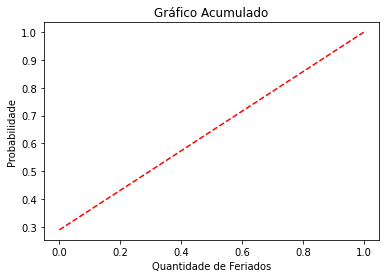

In [ ]:
plt.plot(grafic, 'r--')
plt.title('Gráfico Acumulado')
plt.xlabel('Quantidade de Feriados')
plt.ylabel('Probabilidade')

##**Covariância**

In [ ]:
dataset[['week&holi', 'casual']].cov()

,week&holi,casual
week&holi,0.205283,-6.645899
casual,-6.645899,2430.986021


##**Correlação**

In [ ]:
dataset[['week&holi', 'casual']].corr()

,week&holi,casual
week&holi,1.000000,-0.297499
casual,-0.297499,1.000000


In [ ]:
dataset[['Feriado']] = pd.get_dummies(dataset['holiday'], drop_first=True)
dataset

,datetime,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,week&holi,Feriado
0,2011-01-01 00:00:00,1,0,0,1,24.0,28.79,81.0,0.00,3,13,16,0,0
1,2011-01-01 01:00:00,1,0,0,1,22.0,27.27,80.0,0.00,8,32,40,0,0
2,2011-01-01 02:00:00,1,0,0,1,22.0,27.27,80.0,0.00,5,27,32,0,0
3,2011-01-01 03:00:00,1,0,0,1,24.0,28.79,75.0,0.00,3,10,13,0,0
4,2011-01-01 04:00:00,1,0,0,1,24.0,28.79,75.0,0.00,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,26.0,25.76,60.0,16.42,11,108,119,1,0
17375,2012-12-31 20:00:00,1,0,1,2,26.0,25.76,60.0,16.42,8,81,89,1,0
17376,2012-12-31 21:00:00,1,0,1,1,26.0,25.76,60.0,16.42,7,83,90,1,0
17377,2012-12-31 22:00:00,1,0,1,1,26.0,27.27,56.0,13.43,13,48,61,1,0


In [ ]:
dataset[['Feriado', 'casual']].corr()

,Feriado,casual
Feriado,1.000000,0.031564
casual,0.031564,1.000000


##**Info e Tratamento**

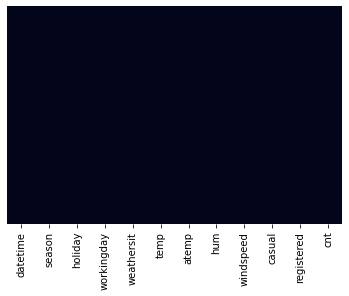

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

##**Normal Padrão**

A seguir vamos normalizar os dados para que sigam uma normal-padrão, no caso teha uma média de 0 e um desvio-padrão de 1.

normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ajuste = scaler.fit(dataset)
normal = scaler.transform(dataset)
normalpadrao = pd.DataFrame(normal)
normalpadrao

,0,1,2,3,4,5,6,7,8,9,10
0,-1.356634,-0.172112,-1.46690,-0.665193,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,-1.356634,-0.172112,-1.46690,-0.665193,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,-1.356634,-0.172112,-1.46690,-0.665193,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,-1.356634,-0.172112,-1.46690,-0.665193,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,-1.356634,-0.172112,-1.46690,-0.665193,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037
...,...,...,...,...,...,...,...,...,...,...,...
17374,-1.356634,-0.172112,0.68171,0.898924,-1.230779,-1.269602,-0.141137,-0.211691,-0.500495,-0.302517,-0.388478
17375,-1.356634,-0.172112,0.68171,0.898924,-1.230779,-1.269602,-0.141137,-0.211691,-0.561343,-0.480908,-0.553875
17376,-1.356634,-0.172112,0.68171,-0.665193,-1.230779,-1.269602,-0.141137,-0.211691,-0.581625,-0.467694,-0.548361
17377,-1.356634,-0.172112,0.68171,-0.665193,-1.230779,-1.181732,-0.348473,-0.456099,-0.459930,-0.698942,-0.708245


In [ ]:
normalpadrao.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04
mean,7.556797e-14,-6.231469e-17,1.067038e-15,-2.369843e-15,3.495934e-16,-1.804746e-15,9.953374e-17,3.938197e-15,-2.642061e-15,1.186122e-15,2.644086e-15
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.356634e+00,-1.721122e-01,-1.466900e+00,-6.651929e-01,-2.477205e+00,-2.768625e+00,-3.251166e+00,-1.553889e+00,-7.236025e-01,-1.016081e+00,-1.039037e+00
25%,-4.531991e-01,-1.721122e-01,-1.466900e+00,-6.651929e-01,-8.153035e-01,-8.290895e-01,-7.631431e-01,-6.996886e-01,-6.424726e-01,-7.914407e-01,-8.240221e-01
50%,4.502360e-01,-1.721122e-01,6.817098e-01,-6.651929e-01,1.564696e-02,5.251758e-02,1.436398e-02,3.189880e-02,-3.788002e-01,-2.562677e-01,-2.616742e-01
75%,4.502360e-01,-1.721122e-01,6.817098e-01,8.989239e-01,8.465975e-01,8.462549e-01,7.918711e-01,5.198962e-01,2.499570e-01,4.374750e-01,5.046626e-01
max,1.353671e+00,5.810164e+00,6.817098e-01,4.027157e+00,2.612367e+00,3.050563e+00,1.932215e+00,5.399871e+00,6.720071e+00,4.837786e+00,4.341860e+00


##**Estatística**

In [ ]:
import plotly.express as px
df = px.data.tips()


**Box Plot**

No gráfico Box plot temos a relação entre número de aluguéis por hora e as estações do ano, o box plot divide os dados entre 4 quartis e fora desses quartis estão os outliers, e nós temos 4 box plot que representam um para cada estação do ano, de acordo com o eixo x (1 = primavera; 2 = verão; 3 = outono; 4 = inverno). 

In [ ]:
fig1 = px.box(dataset, x='season', y='registered')
fig1.show()

**Histograma**


No gráfico Histograma vemos a contagem da quantidade de aluguéis por usuários registrados em uma hora, e podemos notar que a maior concentração de é 0 a 9 aluguéis por usuários registrados em uma hora, e assim que vai aumentando o número de aluguéis por hora vai decaindo a quantidade.

In [ ]:
fig2 = px.histogram(dataset, x='registered', marginal='rug')
fig2.show()

**Scatter Plot**

No gráfico Scatter Plot, estamos correlacionando a quantidade de aluguéis por hora e quantos desses aluguéis foram por usuários já registrados, nele podemos ver uma correlação do tipo linear, ou seja, quanto mais aluguéis tiver por hora mais desses serão por usuários já registrados, apesar de que os dados tenham uma dispersão entre 600 e 800 no eixo x, após isso ele agrupa denovo os dados e continuam seguindo uma linear.

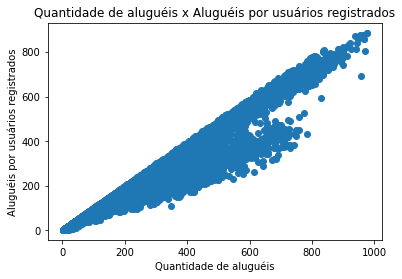

In [ ]:
plt.scatter(dataset['cnt'], dataset['registered'])
plt.title('Quantidade de aluguéis x Aluguéis por usuários registrados')
plt.xlabel('Quantidade de aluguéis')
plt.ylabel('Aluguéis por usuários registrados')
plt.show()

**Heatmap**

O Heatmap é um gráfico que correlaciona as variáveis e indica o quanto a correlação se aproxima de uma linear, ele indica por meio de valores que variam de -1 até 1. Quanto mais próximo o valor da correlação for de 1, mais próximo se aproximará de uma correlação linear, o gráfico indica por cores os níveis de cada correlação, variando a intensidade das cores de acordo com seu valor e seguindo o padrão que está na legenda.


In [ ]:
import seaborn as sns


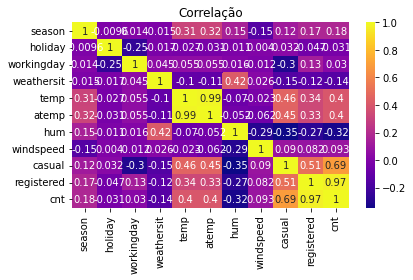

In [ ]:
bikes = dataset[['season', 'holiday', 'workingday', 'weathersit', 'temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
sns.heatmap(bikes.corr(), annot=True, cmap = "plasma").set_title('Correlação')
plt.tight_layout()
plt.show()

##**Distribuição Amostral**

Na distribuição amostral, utilizamos os dados do dataset da coluna de quantidade de aluguéis por hora, agrupados em amostras, e podemos ver que como diz o teorema dos grandes números, quanto maior for quantidade dea amostra mais a distribuição amostral se assemelhará a uma normal, como vemos nos gráficos que o último tem a maior quantidade amostra e ele que mais se assemelha a normal.

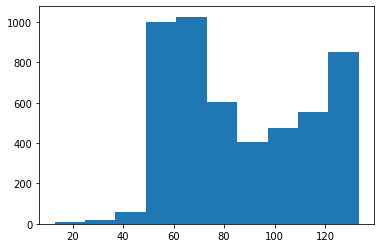

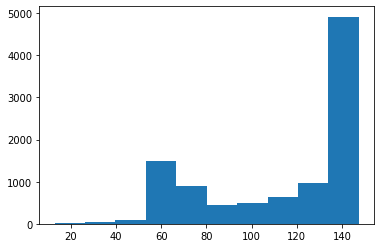

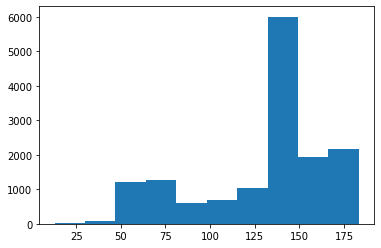

In [ ]:
from numpy import mean
from matplotlib import pyplot

for j in range(5000, 17379, 5000):
  means = [mean(dataset['cnt'][:i]) for i in range(j)]

  pyplot.hist(means)
  pyplot.show()